
# Data Analytics - Base de datos AgenteSalas 

## Librerias

In [247]:
# generales
import pandas as pd
import numpy as  np

# bases de datos
import mysql.connector
import sqlite3 as sql
import psycopg2
import pyodbc

from mysql.connector import Error
from sqlite3 import OperationalError

# visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.get_backend()


'module://matplotlib_inline.backend_inline'

## Conexión con base de datos

In [248]:
# crear diccionario de credenciales 
# conectar a servidor y schema(mySQL Workbench)
mydb = {
    "host": "127.0.0.1",
    "user": "root",
    "password": "201513417Diego",
    "database": "agentes_salas"
}

type(mydb)

dict

In [249]:
# Connect to the MySQL database
connection = mysql.connector.connect(**mydb)
cursor = connection.cursor()

## Extraer variables de base de datos

Tablas:columnas

* baneados: usuario(PK), sancion, fecha_sancion, activa
* cantidad salas: sala (PK), total
* doblelogin: usuario (PK)
* equipos: equipo, direccion IP, usuario (PK)
* historial: usuario (PK), equipo, fecha
* historial_ocupacion: hora, sala(PK), ocupacion
* reservaExtendida: id, usuario(PK), fecha_final_reserva



## Queries 

Extraer tablas de base de datos y convertir en DataFrames (pandas)


In [250]:
query1 = "SELECT * FROM agentes_salas.baneados "
cursor.execute(query1) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
baneados = pd.DataFrame(data, columns=["usuario", "sancion","fecha_sancion","activa"])
baneados = baneados.reset_index(drop=True)
baneados #.head(50)


,usuario,sancion,fecha_sancion,activa
0,sisdj.mendez2973,3,2016-09-01 12:08:16,0
1,sisda-moren,5,2015-02-19 07:52:04,0
2,siss.carvajal269,5,2015-02-18 12:09:19,0
3,sisjs.silva266,5,2015-02-20 10:10:56,0
4,siscm.rodriguez155,5,2015-02-16 13:46:51,0
...,...,...,...,...
247,siswaira2,1,2022-04-22 18:51:50,0
248,siswaira2,1,2022-04-29 21:06:20,0
249,siswaira1,1,2022-05-06 15:17:26,0
250,siswaira2,1,2022-05-06 18:50:49,0


In [251]:
query2 = "SELECT * FROM agentes_salas.cantidad_salas"
cursor.execute(query2) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
cantidad_salas = pd.DataFrame(data, columns=["sala", "total"])
cantidad_salas = cantidad_salas.reset_index(drop=True)
cantidad_salas

,sala,total
0,waira 1,48
1,waira 2,30
2,turing,39


In [252]:
query3 = "SELECT * FROM agentes_salas.equipos"
cursor.execute(query3) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
equipos = pd.DataFrame(data, columns=["equipo", "direccionIP","usuario"])
equipos = equipos.reset_index(drop=True)
equipos

,equipo,direccionIP,usuario
0,ISC203,157.253.202.13,no user
1,ISC301,157.253.239.11,no user
2,ISC302,157.253.239.12,sism.zuliani
3,ISC202,157.253.202.12,no user
4,ISC201,157.253.202.11,no user
...,...,...,...
114,ISC240,157.253.202.50,no user
115,ISC241,157.253.202.51,no user
116,ISC236,157.253.202.46,no user
117,ML605CIVIL,157.253.198.37,no user


In [253]:
query4 = "SELECT * FROM agentes_salas.historial"
cursor.execute(query4) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
historial = pd.DataFrame(data, columns=["usuario", "equipo","fecha"])
historial = historial.reset_index(drop=True)
historial

,usuario,equipo,fecha
0,siss.sanchez59,ISC422,2015-03-02 09:47:58
1,sisd.torres11,ISC202,2015-03-02 09:47:36
2,no user,ISC318,2015-03-02 09:47:27
3,no user,ISC314,2015-03-02 09:47:19
4,sisf.cueto10,ISC208,2015-03-02 09:47:18
...,...,...,...
2028910,sisj.pinzons,ISC424,2023-08-16 08:10:35
2028911,sism.zuliani,ISC302,2023-08-16 08:23:04
2028912,no user,ISC325,2023-08-16 08:23:08
2028913,sisje.briceno2,ISC318,2023-08-16 08:34:31


In [254]:
query5 = "SELECT * FROM agentes_salas.historial_ocupacion"
cursor.execute(query5) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
historial_ocupacion = pd.DataFrame(data, columns=["hora", "sala","ocupacion"])
historial_ocupacion = historial_ocupacion.reset_index(drop=True)
historial_ocupacion

,hora,sala,ocupacion
0,2016-01-27 23:05:00,waira 2,0
1,2016-01-27 23:05:00,waira 1,1
2,2016-01-27 23:00:00,turing,2
3,2016-01-27 23:00:00,waira 2,0
4,2016-01-27 23:00:00,waira 1,1
...,...,...,...
657246,2018-04-02 15:55:00,waira 2,14
657247,2018-04-02 15:55:00,turing,17
657248,2018-04-02 16:00:00,waira 1,25
657249,2018-04-02 16:00:00,waira 2,16


In [255]:
query6 = "SELECT * FROM agentes_salas.reservaextendida"
cursor.execute(query6) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
reservaextendida = pd.DataFrame(data, columns=["id", "usuario","fecha_final_reserva"])
reservaextendida = reservaextendida.reset_index(drop=True)
reservaextendida

,id,usuario,fecha_final_reserva
0,6,sisturing,2016-10-07 14:01:15
1,5,siswaira2,2016-08-01 19:00:00


In [256]:
# Close the cursor and connection
#cursor.close()
#connection.close()

## Análisis Descriptivo

Baneados
* contar número total de usuarios baneados
* contar proporcion de bans activos vs. inactivos
* sanción más comun

Cantidad Salas
* contar numero total de salas unicas
* calcular numero total de sala en todos los records

Doble login
* calcular numero total de usuarios con multiples logins


Equipos
* contar número de equipos unicos
* identificar el equipo más usado

Historial
* contar número de entradas en el historial
* identificar usuario más comun por cada equipo

Historial Ocupacion
* horas (franja horaria) con mayor ocupación

Reserva Extendida
* Contar numero de reservas extendidas







### Proporción de tipo de sanción

In [257]:
baneados['sancion'].value_counts(normalize=True)

8       0.345238
10      0.142857
1       0.138889
3       0.075397
5       0.071429
35      0.055556
29      0.039683
15      0.023810
30      0.023810
12      0.011905
20      0.011905
985     0.007937
114     0.007937
4       0.007937
250     0.003968
50      0.003968
7300    0.003968
500     0.003968
200     0.003968
43      0.003968
100     0.003968
45      0.003968
28      0.003968
Name: sancion, dtype: float64

In [258]:
# contar número de baneados por cada tipo de sanción y número de sanciones activas 
group1 = baneados.groupby('sancion')['usuario','activa']
group1.count()


C:\Users\Diego\AppData\Local\Temp\ipykernel_11880\1549553680.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group1 = baneados.groupby('sancion')['usuario','activa']


,usuario,activa
sancion,,
1,35,35
3,19,19
4,2,2
5,18,18
8,87,87
10,36,36
12,3,3
15,6,6
20,3,3


In [259]:
# proporcion de sanciones activas  
baneados['activa'].value_counts(normalize=True) # 0=inactiva, 1=activa


0    0.996032
1    0.003968
Name: activa, dtype: float64

### Proporcion de cantidad de salas

In [260]:
# proporcion de sanciones activas  
cantidad_salas['total'].value_counts(normalize=True)
cantidad_salas['porcentaje'] = (cantidad_salas['total'] / cantidad_salas['total'].sum()) * 100
cantidad_salas

,sala,total,porcentaje
0,waira 1,48,41.025641
1,waira 2,30,25.641026
2,turing,39,33.333333


### Contar equipos y usuarios

In [261]:
equipos.nunique(axis=0)

equipo         119
direccionIP    119
usuario         10
dtype: int64

### Contar ingresos de usuarios en historial


In [262]:
historial.describe()

C:\Users\Diego\AppData\Local\Temp\ipykernel_11880\574433953.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  historial.describe()


,usuario,equipo,fecha
count,2028915,2028915,2028915
unique,3661,191,1984987
top,no user,ISC,2017-12-07 17:19:50
freq,1190045,767412,53
first,NaN,NaN,2015-02-09 06:42:25
last,NaN,NaN,2023-08-16 08:34:57


In [263]:
group2 = historial.groupby('usuario')['usuario','equipo']
group2.count()

C:\Users\Diego\AppData\Local\Temp\ipykernel_11880\606474533.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group2 = historial.groupby('usuario')['usuario','equipo']


,usuario,equipo
usuario,,
arsetadministrador,14,14
asisadministrador,4,4
builtin,4,4
cc.aparicio324,2,2
hj.garcia652,2,2
...,...,...
sisza.garcia10,4,4
siszd.bautista,108,108
siszl.castaneda10,622,622


In [264]:
historial['usuario'].value_counts()

no user                1190045
iscprofesor             291618
iscadmonsis              64327
isc201administrador      28330
sisturing                15957
                        ...   
sisd.espinosaa               1
sislm.diaz630                1
sisn.zimmermann              1
sisjs.urrego110              1
siss.quevedo1                1
Name: usuario, Length: 3661, dtype: int64

### Franja horaria con mayor ocupación

In [265]:
historial_ocupacion

,hora,sala,ocupacion
0,2016-01-27 23:05:00,waira 2,0
1,2016-01-27 23:05:00,waira 1,1
2,2016-01-27 23:00:00,turing,2
3,2016-01-27 23:00:00,waira 2,0
4,2016-01-27 23:00:00,waira 1,1
...,...,...,...
657246,2018-04-02 15:55:00,waira 2,14
657247,2018-04-02 15:55:00,turing,17
657248,2018-04-02 16:00:00,waira 1,25
657249,2018-04-02 16:00:00,waira 2,16


### Sala con mayor ocupación

In [266]:
salas_ocu = historial_ocupacion.groupby('sala')
salas_ocu = salas_ocu.count()['ocupacion']

salas_ocu = pd.DataFrame(data=salas_ocu, columns=['ocupacion'])
salas_ocu.value_counts()
salas_ocu['porcentaje'] = (salas_ocu['ocupacion'] / salas_ocu['ocupacion'].sum()) * 100
salas_ocu


,ocupacion,porcentaje
sala,,
turing,219010,33.322125
waira 1,219228,33.355293
waira 2,219013,33.322581


### Contar número de Reserva Extendida


In [267]:
reservaextendida

,id,usuario,fecha_final_reserva
0,6,sisturing,2016-10-07 14:01:15
1,5,siswaira2,2016-08-01 19:00:00


## Análisis Estadístico

* 

## Visualizacion de datos

* Pie chart: tipo de sancion - tabla: baneados
* Pie chart: cantidad salas - tabla: cantidad salas
* Pie chart: tipo de usuario - tabla: equipos



### Distribución de tipos de sanciones - Gráfico de Barras

In [268]:
baneados['sancion'].value_counts()

8       87
10      36
1       35
3       19
5       18
35      14
29      10
15       6
30       6
12       3
20       3
985      2
114      2
4        2
250      1
50       1
7300     1
500      1
200      1
43       1
100      1
45       1
28       1
Name: sancion, dtype: int64

In [269]:
aux1 = baneados.groupby('sancion')
aux1 = aux1.count()
total_sancion = pd.DataFrame(data=aux1, columns=['usuario','fecha_sancion','activa'])
total_sancion.reset_index(inplace=True)
total_sancion = total_sancion.sort_values('usuario', ascending=False)
total_sancion = total_sancion.head(10)
total_sancion


,sancion,usuario,fecha_sancion,activa
4,8,87,87,87
5,10,36,36,36
0,1,35,35,35
1,3,19,19,19
3,5,18,18,18
12,35,14,14,14
10,29,10,10,10
11,30,6,6,6
7,15,6,6,6
8,20,3,3,3


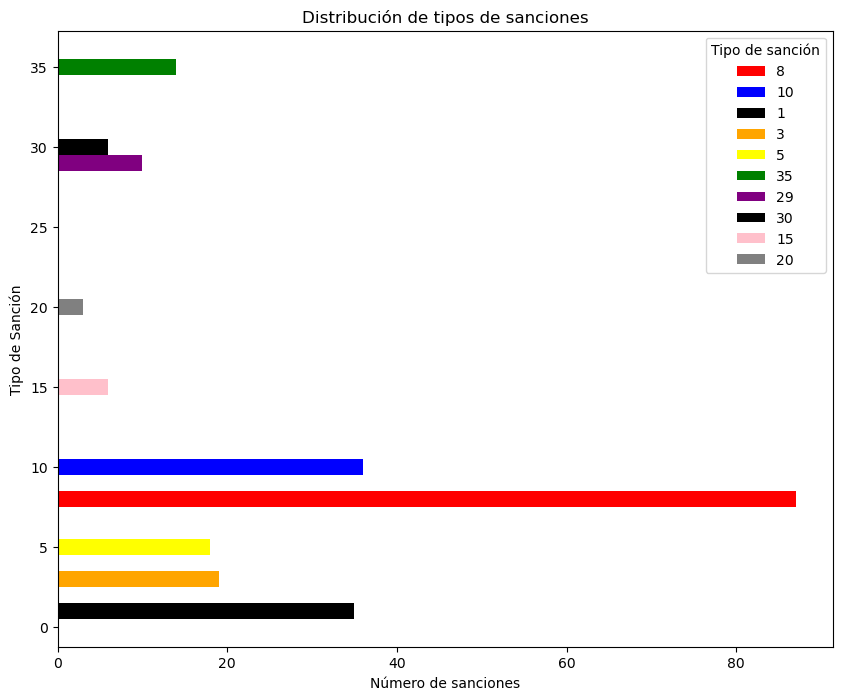

In [270]:
fig, ax = plt.subplots(figsize = (10,8))

tipo_sancion = total_sancion['sancion']
total = total_sancion['usuario']

bar_colors = ['red', 'blue', 'black', 'orange','yellow','green','purple','black','pink','grey']

ax.barh(tipo_sancion, total, label=total_sancion['sancion'], color=bar_colors, height=1) 

ax.set_ylabel('Tipo de Sanción')
ax.set_xlabel('Número de sanciones')
ax.set_title('Distribución de tipos de sanciones')
ax.legend(title='Tipo de sanción')

plt.show()

### NOTA: tipos de sanciones por tiempo


### Porcentaje de tipo de sanciones - Gráfico de Pie

In [271]:
class_proportions = baneados['sancion'].value_counts(normalize=True)
df_class = pd.DataFrame(data = class_proportions)
df_class = df_class.to_dict()
df_class


{'sancion': {8: 0.34523809523809523,
  10: 0.14285714285714285,
  1: 0.1388888888888889,
  3: 0.07539682539682539,
  5: 0.07142857142857142,
  35: 0.05555555555555555,
  29: 0.03968253968253968,
  15: 0.023809523809523808,
  30: 0.023809523809523808,
  12: 0.011904761904761904,
  20: 0.011904761904761904,
  985: 0.007936507936507936,
  114: 0.007936507936507936,
  4: 0.007936507936507936,
  250: 0.003968253968253968,
  50: 0.003968253968253968,
  7300: 0.003968253968253968,
  500: 0.003968253968253968,
  200: 0.003968253968253968,
  43: 0.003968253968253968,
  100: 0.003968253968253968,
  45: 0.003968253968253968,
  28: 0.003968253968253968}}

In [272]:
class_proportions = baneados['sancion'].value_counts(normalize=True)
df_class = pd.DataFrame(data = class_proportions)
df_class.reset_index(inplace=True)
df_class = df_class.rename(columns = {'index':'sancion','sancion':'proporcion'})
dic_class = df_class.to_dict()

threshold = 0.02
df_class['prop_threshold']= df_class.apply(lambda row: row['proporcion'] if row['proporcion'] >= threshold else 'others', axis=1)
sum_others = df_class['proporcion'][9:].sum()
df_aux1 = df_class[:9]

df_aux1 

,sancion,proporcion,prop_threshold
0,8,0.345238,0.345238
1,10,0.142857,0.142857
2,1,0.138889,0.138889
3,3,0.075397,0.075397
4,5,0.071429,0.071429
5,35,0.055556,0.055556
6,29,0.039683,0.039683
7,15,0.023810,0.02381
8,30,0.023810,0.02381


In [273]:
# Create a DataFrame for the float value
float_df = pd.DataFrame({'sancion': 'Otras', 'proporcion': [sum_others]})

# Concatenate the original DataFrame and the float DataFrame
concatenated_df = pd.concat([df_aux1, float_df])

prop_final = concatenated_df[['sancion','proporcion']]  
prop_final


,sancion,proporcion
0,8,0.345238
1,10,0.142857
2,1,0.138889
3,3,0.075397
4,5,0.071429
5,35,0.055556
6,29,0.039683
7,15,0.023810
8,30,0.023810
0,Otras,0.083333


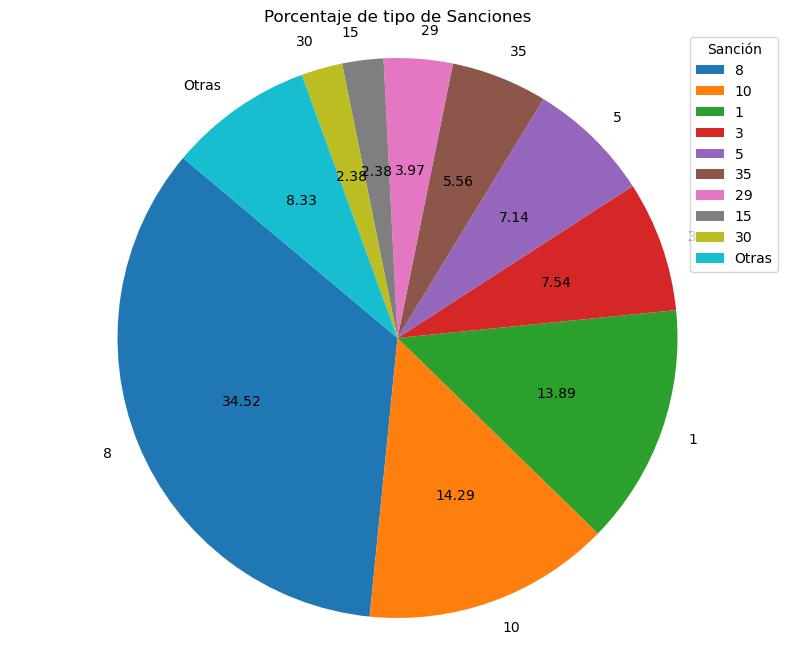

In [274]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(prop_final['proporcion'], labels=prop_final['sancion'], autopct=lambda p: format(p, '.2f') if 5 > 2 else None, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Porcentaje de tipo de Sanciones')
plt.legend(labels=prop_final['sancion'], loc='best', title='Sanción')
plt.show()


### Porcentaje de tipo de sanciones - Gráfico de Pie

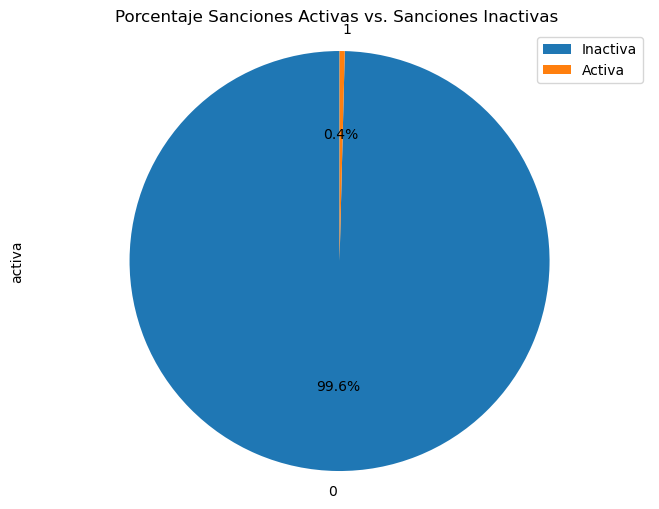

In [275]:
baneados['activa'].value_counts()
# calcular proporcion de clases
class_proportions = baneados['activa'].value_counts(normalize=True)

# crear pie plot
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje Sanciones Activas vs. Sanciones Inactivas ')
plt.legend(labels=['Inactiva','Activa'], loc='best')
plt.axis('equal')

# Show the plot
plt.show()

### Baneados en el Tiempo - Serie de Tiempo

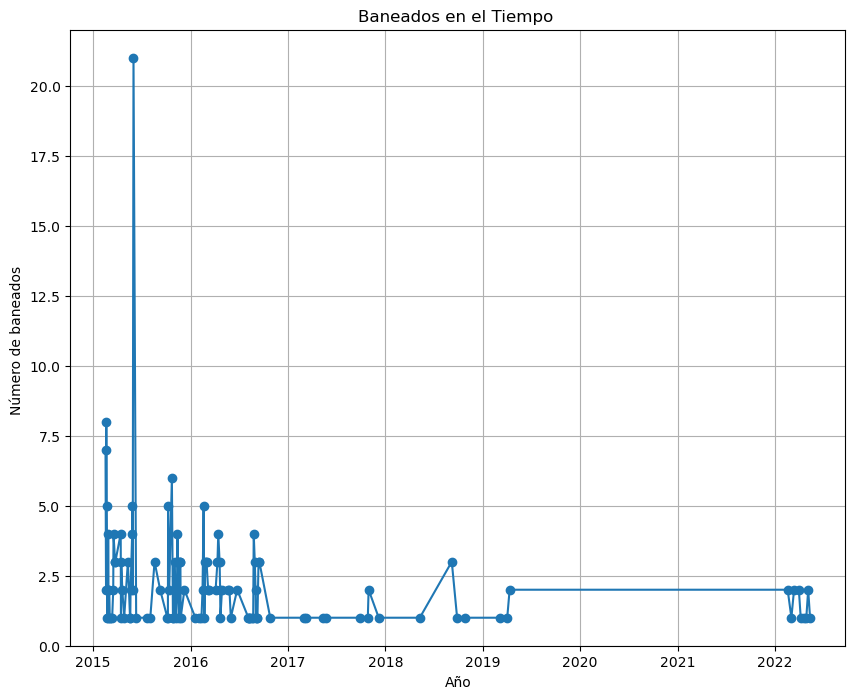

In [276]:
# Convert 'fecha_sancion' column to datetime
baneados['fecha_sancion'] = pd.to_datetime(baneados['fecha_sancion'])

# Group bans by date and count
bans_per_date = baneados.groupby(baneados['fecha_sancion'].dt.date)['sancion'].count()

# Create a time series plot
plt.figure(figsize=(10, 8))
bans_per_date.plot(kind='line', marker='o')

plt.title('Baneados en el Tiempo ')
plt.xlabel('Año')
plt.ylabel('Número de baneados ')
plt.grid(True)

plt.show()


### Distribución de Salas - Gráfico de Barras

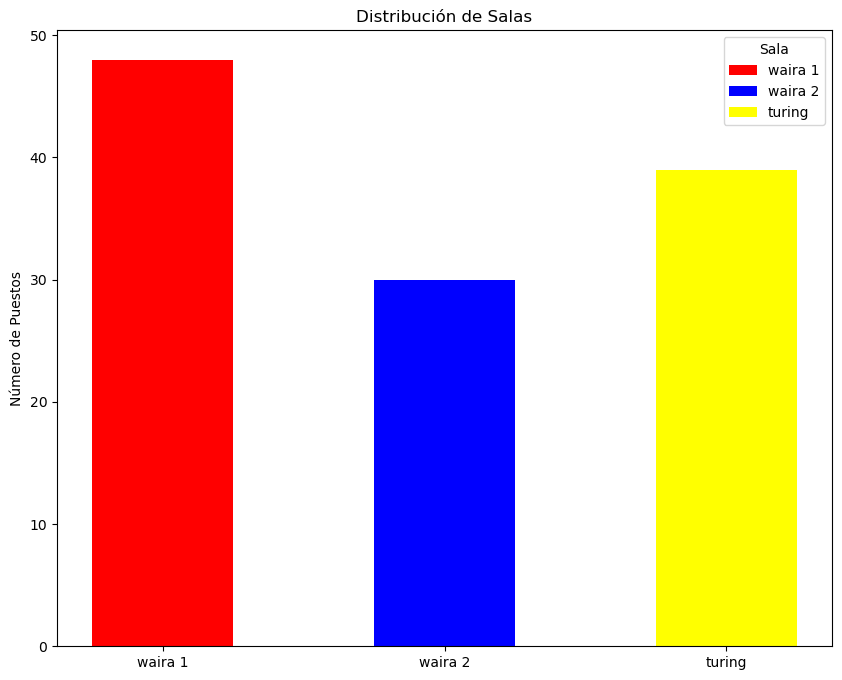

In [277]:
fig, ax = plt.subplots(figsize = (10,8))

sala = cantidad_salas['sala']
total = cantidad_salas['total']

bar_colors = ['red', 'blue','yellow']

ax.bar(sala, total, label= cantidad_salas['sala'], color=bar_colors, width=0.5) 

ax.set_ylabel('Número de Puestos')
ax.set_title('Distribución de Salas')
ax.legend(title='Sala')

plt.show()

### Equipos que más se usan

In [278]:
aux = equipos.groupby(equipos['equipo']).count()
aux


,direccionIP,usuario
equipo,,
ISC201,1,1
ISC202,1,1
ISC203,1,1
ISC204,1,1
ISC205,1,1
...,...,...
ISC437,1,1
ISC438,1,1
ISC439,1,1


### Porcentaje de Usuarios - Gráfico de Pie

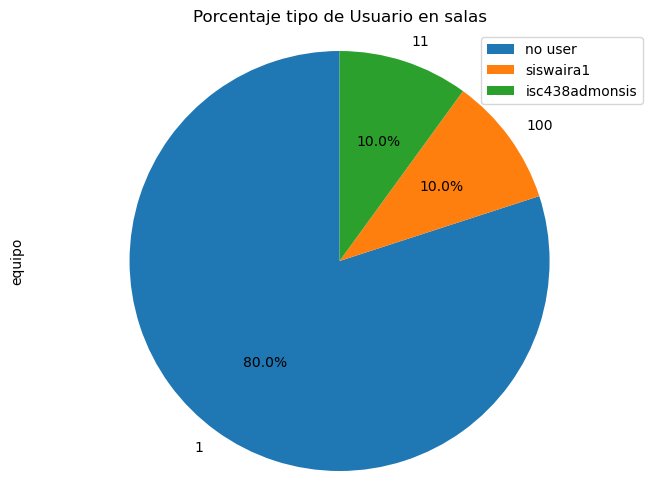

In [279]:
aux2 = equipos.groupby(equipos['usuario']).count()
aux2.reset_index(inplace=True)
aux2 = aux2.sort_values('equipo', ascending=False)
a = aux2['usuario'].to_list() 

aux2['equipo'].value_counts()
# calcular proporcion de clases
class_proportions = aux2['equipo'].value_counts(normalize=True)

# crear pie plot
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje tipo de Usuario en salas')
plt.legend(labels=a, loc='best')
plt.axis('equal')

# Show the plot
plt.show()

### Usuarios con mayor ocupación - Gráfico de Barras

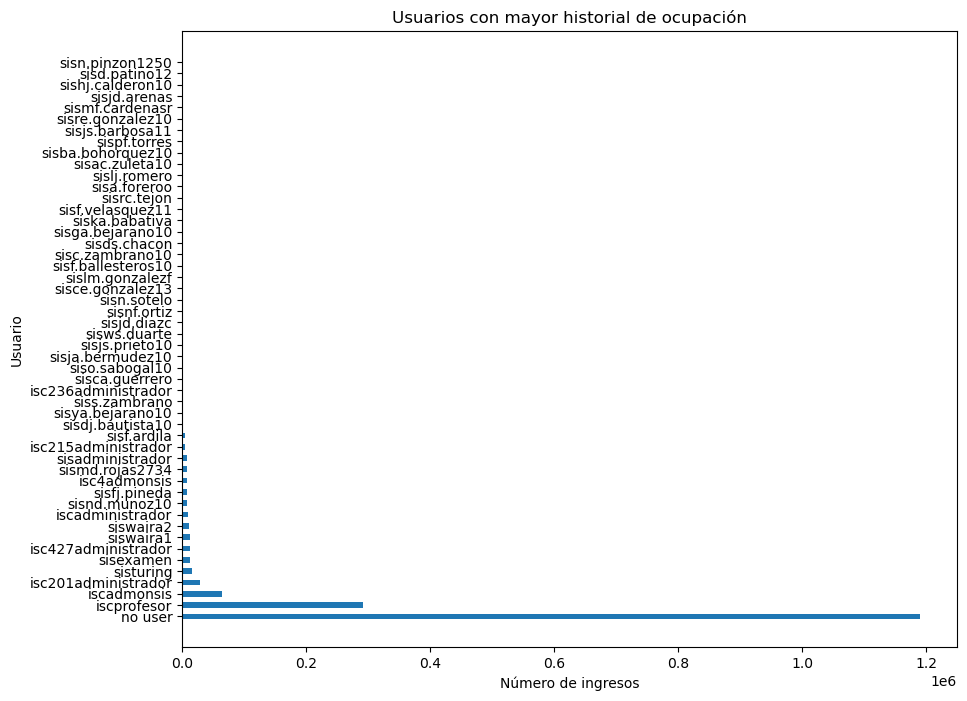

In [280]:
aux3 = historial.groupby(historial['usuario']).count()
aux3.reset_index(inplace=True)
aux3 = aux3.sort_values('equipo', ascending=False)

aux3 = aux3.head(50)
labels_equipos = aux3['usuario'].to_list() 

fig, ax = plt.subplots(figsize = (10,8))

usuario = aux3['usuario']
total = aux3['equipo']

#bar_colors = ['red', 'blue', 'black', 'orange','yellow','green','purple','black','pink','grey']

ax.barh(usuario, total, label=labels_equipos,  height=0.5) # color=bar_colors,

ax.set_ylabel('Usuario')
ax.set_xlabel('Número de ingresos')
ax.set_title('Usuarios con mayor historial de ocupación')
#ax.legend(title='Tipo de sanción')

plt.show()

### Frecuencia de Mayor Uso General a lo largo del Tiempo- Serie de Tiempo

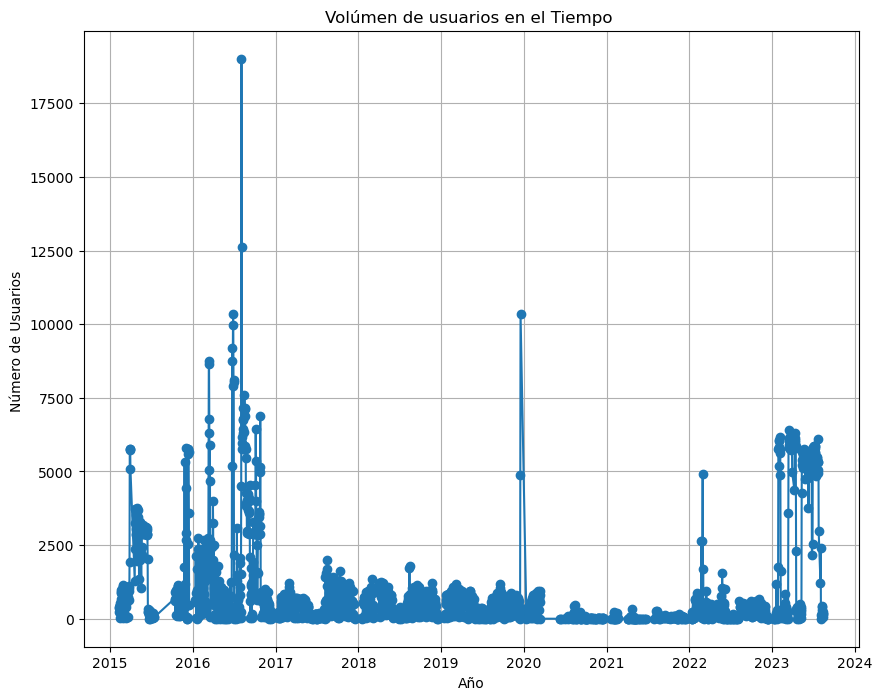

In [298]:
# Convert 'fecha_sancion' column to datetime
historial['fecha'] = pd.to_datetime(historial['fecha'])

# Group bans by date and count
users_per_date = historial.groupby(historial['fecha'].dt.date)['usuario'].count()

# Create a time series plot
plt.figure(figsize=(10, 8))
users_per_date.plot(kind='line', marker='o')

plt.title('Volúmen de usuarios en el Tiempo ')
plt.xlabel('Año')
plt.ylabel('Número de Usuarios ')
plt.grid(True)

plt.show()



### Ocupación de equipos por Sala

In [303]:
# mapear
def map_usuario_to_room(equipo):
    if equipo.startswith('ISC2'):
        return 'Waira1'
    elif equipo.startswith('ISC3'):
        return 'Waira2'
    elif equipo.startswith('ISC4'):
        return 'Turing'
    else:
        return 'Desconocido'  # Handle other cases if needed

# Apply the mapping function to create the 'room' column
historial['sala'] = historial['equipo'].apply(map_usuario_to_room)

historial


,usuario,equipo,fecha,sala
0,siss.sanchez59,ISC422,2015-03-02 09:47:58,Turing
1,sisd.torres11,ISC202,2015-03-02 09:47:36,Waira1
2,no user,ISC318,2015-03-02 09:47:27,Waira2
3,no user,ISC314,2015-03-02 09:47:19,Waira2
4,sisf.cueto10,ISC208,2015-03-02 09:47:18,Waira1
...,...,...,...,...
2028910,sisj.pinzons,ISC424,2023-08-16 08:10:35,Turing
2028911,sism.zuliani,ISC302,2023-08-16 08:23:04,Waira2
2028912,no user,ISC325,2023-08-16 08:23:08,Waira2
2028913,sisje.briceno2,ISC318,2023-08-16 08:34:31,Waira2


<Figure size 1000x800 with 0 Axes>

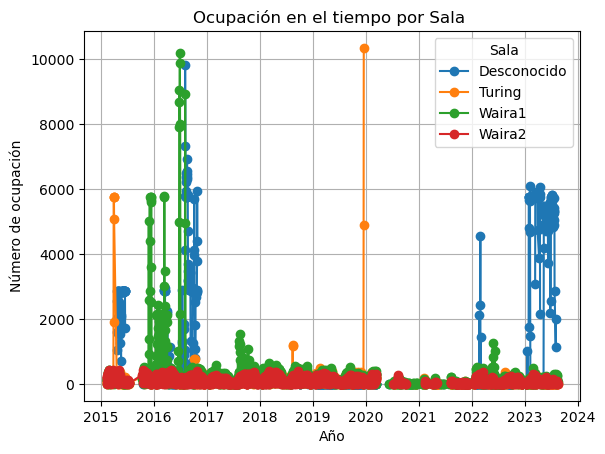

In [304]:
# ocupación por sala
occupation_per_room_date = historial.groupby(['sala', historial['fecha'].dt.date])['usuario'].count()

# Pivot occupation data for plotting
pivot_data = occupation_per_room_date.unstack('sala')

# Create a time series plot
plt.figure(figsize=(10, 8))
pivot_data.plot(kind='line', marker='o')

plt.title('Ocupación en el tiempo por Sala ')
plt.xlabel('Año')
plt.ylabel('Número de ocupación')
plt.legend(title='Sala', loc='upper right')
plt.grid(True)

plt.show()

## Técnicas de Correlación


# Machine Learning and AI